In [1]:
import numpy as np
import json

In [2]:
dir_1 = '/home/jzh/Dropbox/Research/tsp_rev_refs_backup/figs/'
dir_2 = '/home/jzh/Dropbox/tsp_rev_refs/anomaly-weakconv-waze/'

In [3]:
# N_list = [2, 3, 4, 5, 6, 7, 8]
# beta_list = [0.1, 0.01, 0.001, 0.0001, 0.00001]

N_list = [2, 4, 6, 8]
beta_list = [0.001]

k_list = range(21)[1:]

save_data_dict = {}

for N in N_list:
    for beta in beta_list:
        for k in k_list:
            with open(dir_1 + 'eta_KL_mb_N_%s_beta_%s_k_%s.json'%(N, beta, k), 'r') as json_file:
                save_data_dict[(N, beta, k)] = json.load(json_file)

In [4]:
save_data_dict[(2, 0.001, 1)]

{u'N': 2,
 u'beta': 0.001,
 u'eta_Sanov': [0.8634694098727671,
  0.7675283643313485,
  0.6907755278982137,
  0.6279777526347398,
  0.5756462732485114,
  0.5313657906909336,
  0.4934110913558669,
  0.4605170185988091,
  0.43173470493638355,
  0.40633854582247864,
  0.38376418216567426,
  0.3635660673148493,
  0.34538776394910686,
  0.32894072757057796,
  0.3139888763173699,
  0.3003371860427016,
  0.2878231366242557,
  0.27631021115928545,
  0.2656828953454668,
  0.2558427881104495,
  0.24670554567793346],
 u'eta_actual': [0.4255081909372103,
  0.386579711964232,
  0.4428448043660364,
  0.3116357740738547,
  0.374330275689541,
  0.3193895046322159,
  0.37268438070954213,
  0.30168559806229495,
  0.27768219763706165,
  0.26539753619322454,
  0.24208058137230073,
  0.2617703190618942,
  0.24201830375557598,
  0.25796025558476726,
  0.24201830375557598,
  0.24201830375557598,
  0.24201830375557598,
  0.24201830375557598,
  0.2420370908777447,
  0.17056097275567672,
  0.24201830375557598],


In [5]:
err_sv_dict = {}
err_wc_1_dict = {}
err_wc_2_dict = {}

for N in N_list:
    for beta in beta_list:
        for n_idx in xrange(len(save_data_dict[(N, beta, 1)]['n_range'])):
            assert(len(save_data_dict[(N, beta, 1)]['n_range']) == \
                   len(save_data_dict[(N, beta, 1)]['eta_Sanov']))
            len_eta_lis = len(save_data_dict[(N, beta, 1)]['eta_Sanov'])
            n = save_data_dict[(N, beta, 1)]['n_range'][n_idx]
            err_sv_dict[(n, beta, N)] = np.mean([(save_data_dict[(N, beta, k)]['eta_Sanov'][n_idx] - \
                                                  save_data_dict[(N, beta, k)]['eta_actual'][n_idx]) ** 2 \
                                                 for k in k_list])
            err_wc_1_dict[(n, beta, N)] = np.mean([(save_data_dict[(N, beta, k)]['eta_wc_1'][n_idx] - \
                                                    save_data_dict[(N, beta, k)]['eta_actual'][n_idx]) ** 2 \
                                                   for k in k_list])
            err_wc_2_dict[(n, beta, N)] = np.mean([(save_data_dict[(N, beta, k)]['eta_wc_2'][n_idx] - \
                                                    save_data_dict[(N, beta, k)]['eta_actual'][n_idx]) ** 2 \
                                                   for k in k_list])

In [6]:
err_sv_dict

{(8, 0.001, 2): 0.11647781977619562,
 (9, 0.001, 2): 0.086445066579782973,
 (10, 0.001, 2): 0.063119128879060751,
 (11, 0.001, 2): 0.05002590588848381,
 (12, 0.001, 2): 0.032114948797510839,
 (13, 0.001, 2): 0.027584522144083041,
 (14, 0.001, 2): 0.023997183654778962,
 (15, 0.001, 2): 0.021368152671119387,
 (16, 0.001, 2): 0.014187536714332403,
 (17, 0.001, 2): 0.014397818477929526,
 (18, 0.001, 2): 0.010468187884159659,
 (19, 0.001, 2): 0.0099922014493008162,
 (20, 0.001, 2): 0.01032837142646127,
 (21, 0.001, 2): 0.0079977193480471193,
 (22, 0.001, 2): 0.0090545181050793889,
 (23, 0.001, 2): 0.0085850393643875176,
 (24, 0.001, 2): 0.0083895049077656846,
 (25, 0.001, 2): 0.0078638305692209972,
 (26, 0.001, 2): 0.0059576810045471398,
 (27, 0.001, 2): 0.0041544491275552018,
 (28, 0.001, 2): 0.0041791496121618508,
 (32, 0.001, 4): 0.08193141964572645,
 (36, 0.001, 4): 0.064794944550789421,
 (40, 0.001, 4): 0.05522393139531645,
 (44, 0.001, 4): 0.050144859990339241,
 (48, 0.001, 4): 0.0401

In [7]:
%matplotlib inline

/home/jzh/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


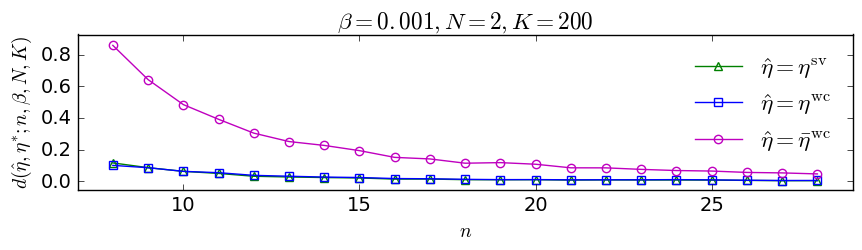

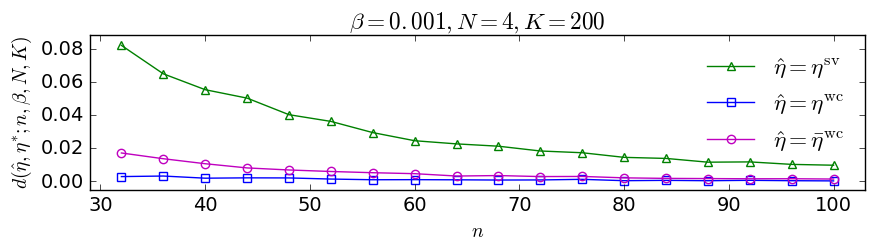

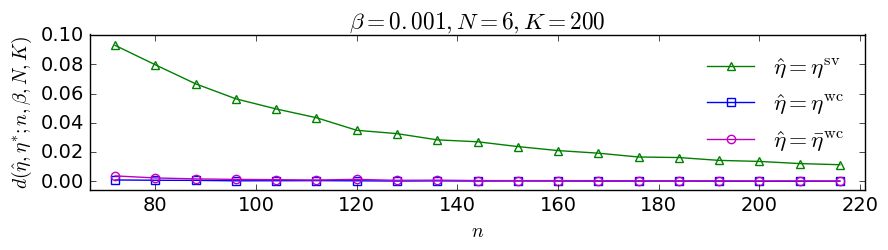

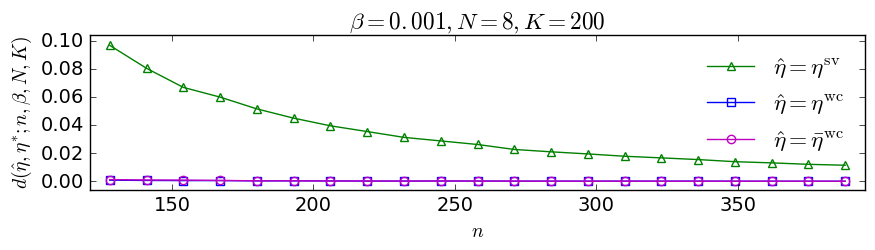

In [8]:
import matplotlib.pyplot as plt
import pylab
from pylab import *

for N in N_list:
    for beta in beta_list:
        
        font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}

        plt.figure(figsize=(10, 2))

        matplotlib.rc('font', **font)

        n_list = save_data_dict[(N, beta, 1)]['n_range']

        err_sv_avg, = plt.plot(n_list, [err_sv_dict[(n, beta, N)] for n in n_list], "g-^", linewidth=1, \
                               markerfacecolor="None", markeredgecolor="g", markeredgewidth=1)
        
        err_wc_1_avg, = plt.plot(n_list, [err_wc_1_dict[(n, beta, N)] for n in n_list], "b-s", linewidth=1, \
                                markerfacecolor="None", markeredgecolor="b", markeredgewidth=1)
        
        err_wc_2_avg, = plt.plot(n_list, [err_wc_2_dict[(n, beta, N)] for n in n_list], "m-o", linewidth=1, \
                                markerfacecolor="None", markeredgecolor="m", markeredgewidth=1)

        plt.legend([err_sv_avg, err_wc_1_avg, err_wc_2_avg], [r"$\hat \eta = \eta^{\mathrm{sv}}$", \
                                                              r"$\hat \eta = \eta^{\mathrm{wc}}$", \
                                                              r"$\hat \eta = \bar \eta^{\mathrm{wc}}$"], \
                   frameon=False, numpoints=1) 
        plt.xlabel(r"$n$")
        plt.ylabel(r"$d({\hat \eta ,\eta^{*};n,\beta,N,K})$")
        plt.title(r"$\beta = %s, N = %s, K = 200$"%(beta, N))
        pylab.xlim(np.amin(n_list) - (N - 1), np.amax(n_list) + (N - 1))
        # plt.xticks(N_list)
        y_max = np.amax([np.amax([err_sv_dict[(n, beta, N)] for n in n_list]), \
                         np.amax([err_wc_1_dict[(n, beta, N)] for n in n_list]), \
                         np.amax([err_wc_2_dict[(n, beta, N)] for n in n_list])])
        pylab.ylim(-0.06 * y_max, 1.08 * y_max)

        savefig(dir_2 + 'err_comp_mb_%s.eps'%(N), dpi=300, bbox_inches="tight")

        plt.show()

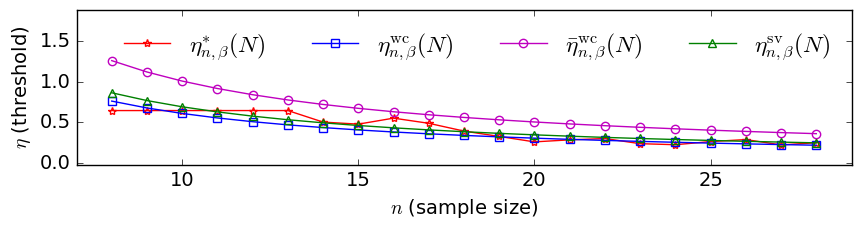

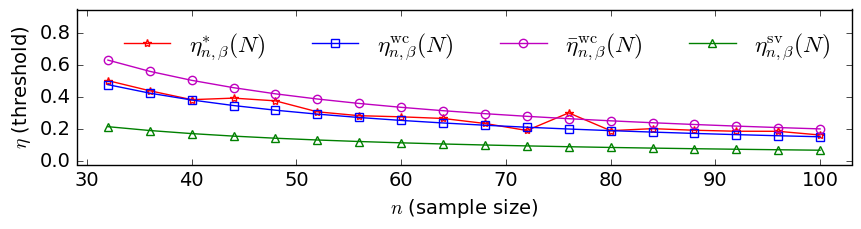

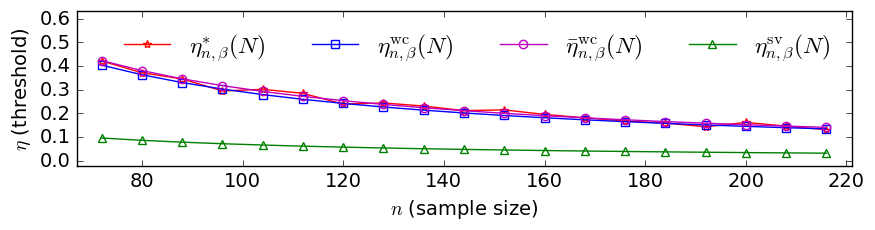

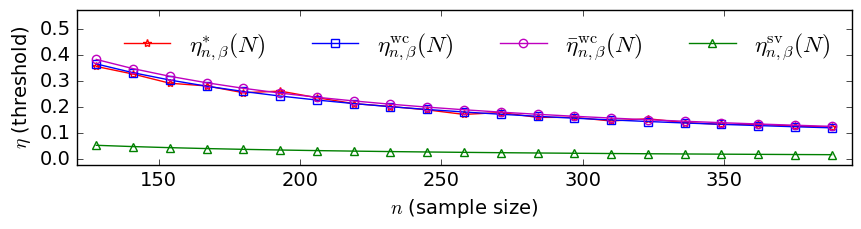

In [41]:
import numpy as np
from matplotlib.mlab import prctile
import matplotlib.pyplot as plt
import pylab
from pylab import *


# N_list = [2, 3, 4, 5, 6, 7, 8]
# beta_list = [0.1, 0.01, 0.001, 0.0001, 0.00001]

N_list = [2, 4, 6, 8]
beta_list = [0.001]

k_list = [3]

# k_list = range(21)[1:]

# N_list = [2]
# beta_list = [0.1]

save_data_dict = {}

for N in N_list:
    for beta in beta_list:
        for k in k_list:
            eta = np.load(dir_1 + 'eta_KL_mb_N_%s_beta_%s_k_%s.eps.npz'%(N, beta, k))

            n_range = eta['n_range']
            eta_actual = eta['eta_actual']
            eta_wc_1 = eta['eta_wc_1']
            eta_wc_2 = eta['eta_wc_2']
            eta_Sanov = eta['eta_Sanov']

            eta.close()

            # print n_range
            # print eta_actual
            # print eta_wc
            # print eta_Sanov

            font = {'family' : 'normal',
                    'weight' : 'normal',
                    'size'   : 14}

            plt.figure(figsize=(10, 2))

            matplotlib.rc('font', **font)

            eta_actual_, = plt.plot(n_range, eta_actual, "r-*", linewidth=1, \
                                    markerfacecolor="None", markeredgecolor="r", markeredgewidth=1)
            
            eta_wc_1_, = plt.plot(n_range, eta_wc_1, "b-s", linewidth=1, \
                                  markerfacecolor="None", markeredgecolor="b", markeredgewidth=1)
            
            eta_wc_2_, = plt.plot(n_range, eta_wc_2, "m-o", linewidth=1, \
                                  markerfacecolor="None", markeredgecolor="m", markeredgewidth=1)
            
            eta_Sanov_, = plt.plot(n_range, eta_Sanov, "g-^", linewidth=1, \
                                   markerfacecolor="None", markeredgecolor="g", markeredgewidth=1)

            plt.legend([eta_actual_, eta_wc_1_, eta_wc_2_, eta_Sanov_], [r"$\eta^{*}_{n,\beta}(N)$", \
                                                                     r"$\eta_{n,\beta}^{\mathrm{wc}}(N)$", \
                                                                     r"$\bar{\eta}_{n,\beta}^{\mathrm{wc}}(N)$", \
                                                                     r"$\eta_{n,\beta}^{\mathrm{sv}}(N)$"], \
                      numpoints=1, fancybox="false", frameon=False, ncol=4) 
            plt.xlabel('$n$ (sample size)')
            plt.ylabel('$\eta$ (threshold)')

            # plt.grid()
            # plt.title('Threshold ($\eta$) versus Number of samples ($n$)')
            # pylab.xlim(np.amin(n_range) - 1, np.amax(n_range) + 1)
            pylab.ylim(-0.02, 1.5 * max(eta_wc_2))
            pylab.xlim(np.amin(n_range) - (N - 1), np.amax(n_range) + (N - 1))

            # pylab.ylim(0.0, 1.2)
            savefig(dir_2 + 'eta_comp_mb_N_%s.eps' %(N), dpi=300, bbox_inches="tight")
            # if args.show_pic:
            #     print('--> export result to %s' % (fig_dir_1 + 'eta_comp_mb_N_%s_beta_%s_k_%s.eps' % (N, beta, k)))
            #     plt.show()

In [22]:
eta_wc_2

array([ 0.38458701,  0.34912863,  0.31965673,  0.29477328,  0.27348409,
        0.25506289,  0.23896668,  0.22478145,  0.21218594,  0.20092709,
        0.19080286,  0.18164995,  0.17333499,  0.16574794,  0.15879722,
        0.152406  ,  0.14650934,  0.14105197,  0.13598657,  0.13127237,
        0.12687406])